# Counterforce vs countervalue targeting

I have made an interactive version of the OPEN-RISOP target map [here](https://www.google.com/maps/d/edit?mid=10YSHa8Xe25zrA0PILlEPpXOGa3qJnNU&usp=sharing). I have classified every target as either military, dual-use, war-supporting industry, critical infrastructure or other civilian. From this, we can look at how many fatalities and soot we get for different levels along the counterforce-countervalue continuum.

This notebook is simply used to make figures that were generated in the `nuclear-attack.ipynb` notebook.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

In [10]:
results = {"ICBM_silos_only": {"fatalities": 114022, "soot": 0.0, "industry_destroyed": 0.2},
           "Plus_other_military_targets": {"fatalities": 5790875, "soot": 0.4, "industry_destroyed": 3.8},
           "Plus_dual-use_targets": {"fatalities": 8972678, "soot": 0.5, "industry_destroyed": 6.6},
           "Plus_war-supporting_industries": {"fatalities": 13252763, "soot": 0.7, "industry_destroyed": 13.6},
           "Plus_critical_infrastructure": {"fatalities": 35796030, "soot": 3.5, "industry_destroyed": 20.5},
           "Plus_other_civilian_targets": {"fatalities": 48711009, "soot": 4.9, "industry_destroyed": 23.3}}

for key in results:
    results[key]["fatalities"] /= 1e6


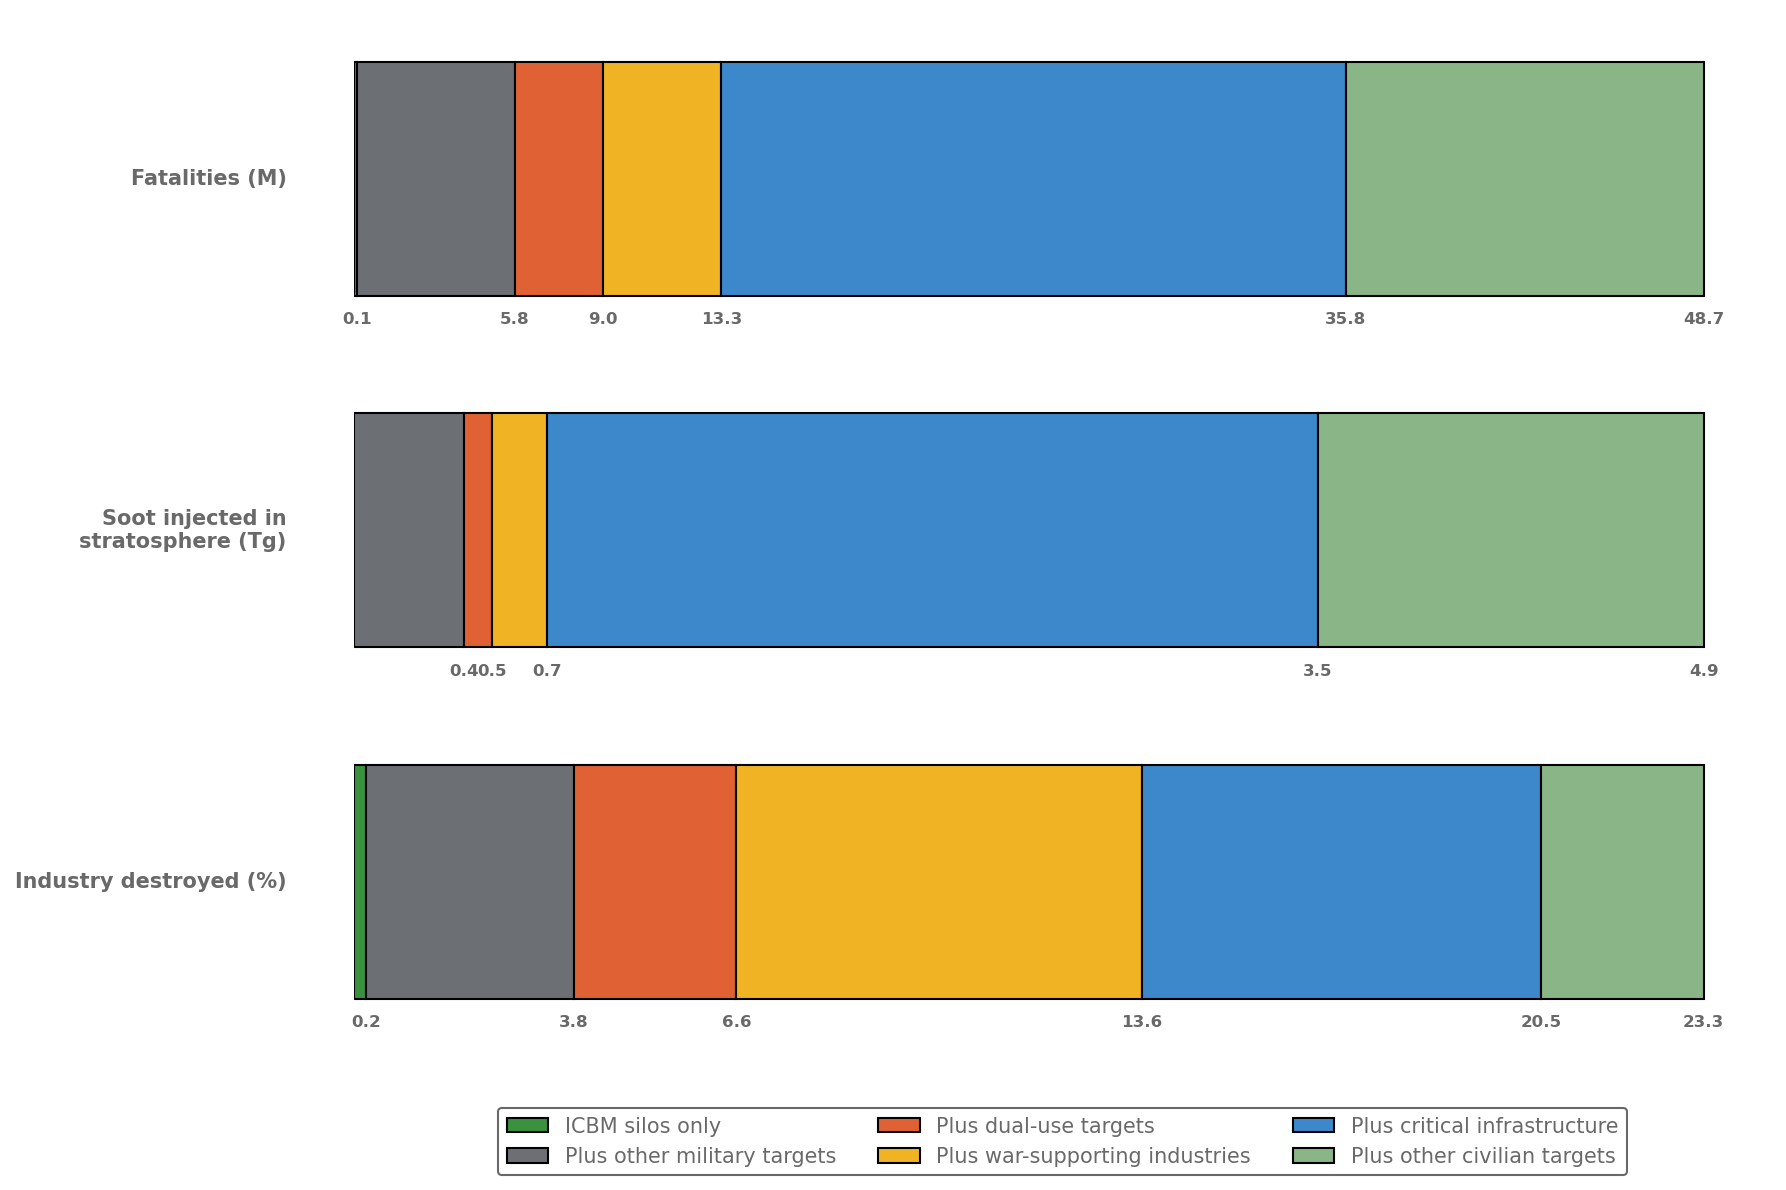

In [11]:
# Define colors according to the provided color scheme
colors = [
    "#3A913F",
    "#6c7075",
    "#e06234",
    "#F0B323",
    "#3D87CB",
    "#89b587",
    "#9b9da1",
    "#ec9c76",
    "#f6cd85",
    "#85abda",
    "#d3e1d0",
    "#d8d8d9",
    "#f9dbc9",
    "#fbecd2",
    "#d3dff1",
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define categories
categories = list(results.keys())

# Create stacked bars for each metric
metrics = ["fatalities", "soot", "industry_destroyed"]
y_positions = [0.7, 0.4, 0.1]  # Y-positions for each bar


for i, metric in enumerate(metrics):
    left = 0
    total = np.nanmax([results[category][metric] for category in categories])
    for j, category in enumerate(categories):
        value = results[category][metric]
        if not np.isnan(value):
            width = value / total - left  
            rect = ax.barh(
                y_positions[i],
                width,
                left=left,
                height=0.2,
                color=colors[j],
                edgecolor="black",
            )

            # Add text label
            if width > 0:
                ax.text(
                    left + width,
                    y_positions[i]-0.12,
                    f"{value:.1f}",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                )
            left += width
            

# Remove axes
ax.axis("off")

# Add metric labels
names = [
    "Fatalities (M)",
    "Soot injected in\nstratosphere (Tg)",
    "Industry destroyed (%)",
]
for i, metric in enumerate(metrics):
    ax.text(-0.05, y_positions[i], names[i], ha="right", va="center", fontweight="bold")

# Add legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], edgecolor="black")
    for i in range(len(categories))
]
ax.legend(
    legend_elements,
    [cat.replace("_", " ") for cat in categories],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
)

plt.tight_layout()
plt.show()